# Homework 3 (Due 10/18/2024 at 11:59pm)


## Name:

## ID:

**Submission instruction:**
- Download the file as .ipynb (see top right corner on the webpage).
- Write your name and ID in the field above.
- Answer the questions in the .ipynb file in either markdown or code cells.
- Before submission, make sure to rerun all cells by clicking `Kernel` -> `Restart & Run All` and check all the outputs.
- Upload the .ipynb file to Gradescope.

**Q1.** 
Before applying any algorithm to a real-world problem, it is common practice to first understand its behavior on synthetic data. Let’s generate a synthetic data set for a regression problem: given input-output pairs, we aim to learn a function that maps inputs to outputs.

Suppose we have input $x$ and output $y$ that are related by the equation $y = 2x + 1$. 

However, in practice, we can only observe noisy data. That is, given input $x_i$, we observe output $y_i$ that is related to $x_i$ by the equation $y_i = 2x_i + 1 + \epsilon_i$, where $\epsilon_i$ is a random noise term. A common model for $\epsilon_i$ is a Gaussian random variable with mean 0 and variance $\sigma^2$.

Suppose $\sigma = 1$.
Generate 10 data points for $x$ uniformly randomly distributed in the range of $[0, 1]$. Make a plot that contain the following elements:

(1) The ground truth function.

(2) The noisy data points.

(3) Add a legend to the plot, where the ground truth is labeled as "Ground truth" and the noisy data points are labeled as "Noisy data". Label the x-axis as "x" and the y-axis as "y".

A sample figure is shown below.


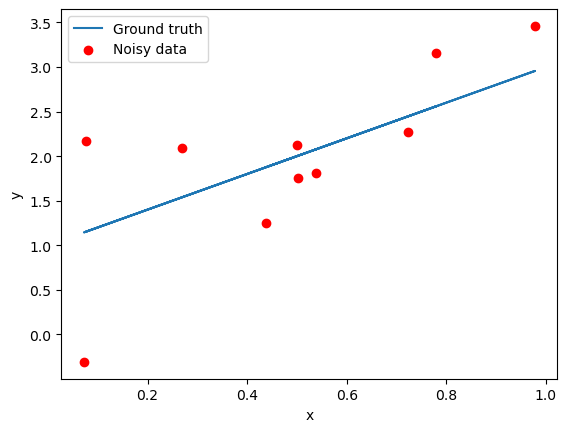

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
# Set your preferred random seed
np.random.seed(7)

N = 10
# Generate N data points for x uniformly distributed in the range [0, 1]
x = np.random.rand(N)

# Define the ground truth equation y = 2x + 1
y_ground_truth = 2 * x + 1

# Add noise to the ground truth to generate noisy data
epsilon = np.random.normal(0, 1, size=x.shape)
y_noisy = y_ground_truth + epsilon

# Plotting the data
plt.figure()

# Plot the ground truth
plt.plot(x, y_ground_truth, label='Ground truth')

# Plot the noisy data points
plt.scatter(x, y_noisy, color='red', label='Noisy data')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()

**Q2** 

We usually denote a normal distribution with mean $\mu$ and variance $\sigma^2$ as $\mathcal{N}(\mu, \sigma^2)$. 

Let's generate a synthetic data set for a classification problem. Let X be a random variable that follows a normal distribution $\mathcal{N}(0, 1)$ and Y be a random variable that follows a normal distribution $\mathcal{N}(2, 0.5^2)$.
X and Y can be some feature of two groups. For example, the height of high school students and the height of college students. Different groups can have different distributions of the same feature.

Generate 1000 samples for X and 500 samples for Y. This models the scenario where we have more data for one group than the other. 

(1) Plot the histograms of X and Y in the same figure. 

(2) Add label "X samples" to the histogram of X and label "Y samples" to the histogram of Y. Add a legend to the plot.

(3) The two histograms should have different color and set the transparency to 0.5 so that we can see the overlap of the two histograms.

Hint: the transparency is usually named as ``alpha`` in most plotting libraries.

A sample figure is shown below.

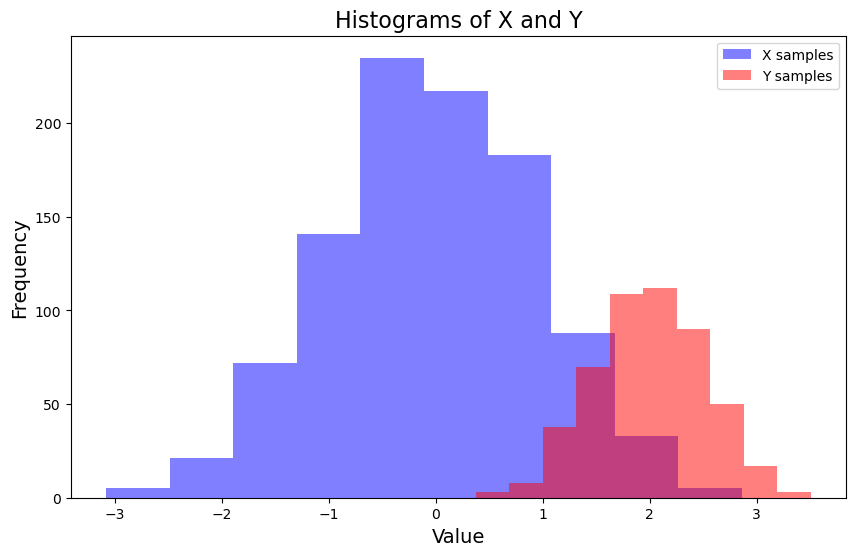

In [13]:
# Generate 1000 samples for X
X = np.random.normal(0, 1, 1000)

# Generate 500 samples for Y
Y = np.random.normal(2, 0.5, 500)

# Plotting the histograms of X and Y
plt.figure(figsize=(10, 6))

# Plot histogram for X
plt.hist(X, alpha=0.5, color='blue', label='X samples')

# Plot histogram for Y
plt.hist(Y, alpha=0.5, color='red', label='Y samples')

# Add labels and legend
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histograms of X and Y', fontsize=16)
plt.legend()

# Show the plot
plt.show()

**Q3.** Let's bring our data science skill to the Wall Street. 
One model of stock price is the random walk model:

Suppose $X_n$ is the stock price at day $n$. $X_0$ is the initial stock price. At each day, the change of stock price is a random variable $Z_n$, which is normally distributed with mean $\mu$ and variance $\sigma^2$. The stock price at day $n$ is $X_n = X_{n-1} + Z_n$.

(1) Write a function `stock_price_simulation`, that take input 

- `X0`: the initial stock price
- `mu`: the mean of the normal distribution
- `sigma`: the standard deviation of the normal distribution
- `n`: the number of days

Return a list (or numpy array) of stock prices at each day $[X_0, X_1, ..., X_n]$.





In [14]:
import numpy as np
def stock_price_simulation(X0, mu, sigma, n):
    # simulate stock price for n days
    x = np.zeros(n+1)
    x[0] = X0
    for i in range(1,n+1):
        x[i] = x[i-1] + np.random.normal(mu, sigma)
    return x



(2) Take $X_0 = 100, n = 100, \mu = 0.1, \sigma = 1$. Sample 10 trajectories of the stock price and plot them in the same graph.

A sample figure is shown below.


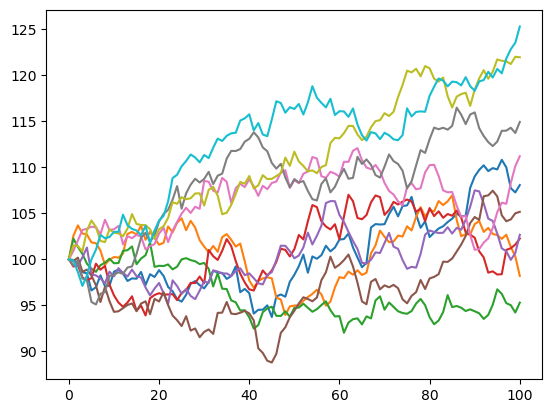

In [15]:
import matplotlib.pyplot as plt

N = 10
n = 100
x0 = 100
mu = 0.1
sigma = 1
trajectories = np.zeros((N, n+1))
for i in range(N):
    trajectories[i] = stock_price_simulation(x0, mu, sigma, n)

fig = plt.plot(trajectories.T)



(3) Estimate the expectation and standard deviation of the stock price on day 100, using 1000 samples.

In [16]:
N = 1000
trajectories = np.zeros((N, n+1))
for i in range(N):
    trajectories[i] = stock_price_simulation(x0, mu, sigma, n)

final_prices = trajectories[:, -1]

estimate_mean = np.mean(final_prices)
estimate_std = np.std(final_prices)

print(f'Estimate mean: {estimate_mean:.2f}, Estimate variance: {estimate_std:.2f}')


Estimate mean: 109.72, Estimate variance: 9.88


(4) (Challenge, not graded) A call option is a contract that allows you to buy a stock at a fixed price at a future date. Suppose you own a call option that allows you to buy a stock at day 100 at price 105 (this is called the strike price).

If the stock price at day 100 is above 105. Then you can exercise the option, pay 105 to get the stock, and sell it at the market price to make a profit. Otherwise, you don't exercise the option and don't make a profit. 

Estimate the probability that you can make a profit using the call option. Suppose you're the seller or the buyer of this call option. Estimate what should be the fair price of the call option.

In [17]:
strike_price = 105
est_prob=np.sum(final_prices>strike_price)/N
print(f'Estimated probability of profit: {est_prob}')

# The fair price is the expected payoff of the option
# payoff of the option based on the sampled final prices
payoff = np.maximum(final_prices - strike_price, 0)

# estimate expectation by sample mean
expected_payoff = np.mean(payoff) 

print(f'Expected payoff: {expected_payoff:.2f}')

Estimated probability of profit: 0.68
Expected payoff: 6.79


Q4

One model of wealth inequality is the [pareto distribution](https://en.wikipedia.org/wiki/Pareto_distribution). 

Let's generate N = 1000 samples from a pareto distribution with parameters `a=20` using the following code:


In [18]:
import numpy as np
N = 1000
a = 20
x = np.random.pareto(a, N)

You can think of x as samples of wealth of a population. 

(1) Plot the histogram of the samples. 

<Axes: ylabel='Count'>

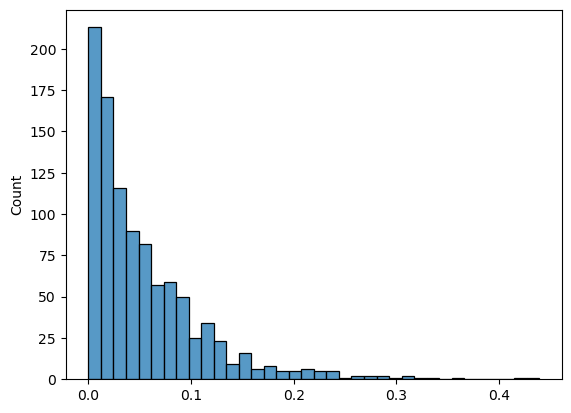

In [19]:
import seaborn as sns
sns.histplot(x)



(2) The k-quantile of a distribution is the value such that k% of the samples are less than or equal to the value. For example, the 50-quantile is the median. 

What are the median and the mean of the samples? What is the percentage of the population that are above-average wealthy? 

In [20]:
print( f'Mean: {np.mean(x)}')
print( f'Median: {np.median(x)}')

# The mean is much larger than the median, indicating a skewed distribution.

percent_above_mean = np.mean(x>np.mean(x))
print(f'Percent above mean: {percent_above_mean:.2f}')

# In this case, being "above average" actually lands in the top ~30% of the population.

Mean: 0.05478922635429945
Median: 0.03654850409304311
Percent above mean: 0.37


(3) Estimate what percentage of the population owns more than 80% of the wealth? 

Hint: you can sort the array such that $x_1 > x_2 > \cdots > x_{N}$, and compute the cumulative sum of the array: $y_i = x_1 + x_2 + \cdots + x_i$. Then $y_i$ is the total wealth of the top i people. 

In [21]:
# sort x in descending order
x_sorted = np.sort(x)[::-1]

# y_i is the total wealth of the top i person in the population
y = np.cumsum(x_sorted)

total_wealth = sum(x)
top_n = np.argmax(y > 0.8 * total_wealth)

print(f'Top {top_n/N*100}% people have 80% of the total wealth')

Top 42.199999999999996% people have 80% of the total wealth
